In [72]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (accuracy_score,precision_score,recall_score,roc_auc_score,classification_report)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
import time

In [73]:
data = pd.read_csv("/content/drive/MyDrive/fertility_Diagnosis_cleaned.csv")
data

,Season,Age,Childish_Diseases,Trauma,Surgical_Intervention,Accident_Frequency,Alcohol_Consumption,Smoking_Status,Sitting_Hours,Diagnosis_Class
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


# EDA (Explorasi Data Analyss)

In [74]:
data.head(5)

,Season,Age,Childish_Diseases,Trauma,Surgical_Intervention,Accident_Frequency,Alcohol_Consumption,Smoking_Status,Sitting_Hours,Diagnosis_Class
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [75]:
data.tail(8)

,Season,Age,Childish_Diseases,Trauma,Surgical_Intervention,Accident_Frequency,Alcohol_Consumption,Smoking_Status,Sitting_Hours,Diagnosis_Class
92,0.33,0.75,1,1,0,0,0.8,-1,0.38,N
93,0.33,0.75,1,0,1,0,0.8,-1,0.44,O
94,1.00,0.58,1,0,0,0,0.6,1,0.50,N
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N
99,-1.00,0.69,0,1,1,0,0.6,-1,0.19,N


In [76]:
# Cek Data Duplikat

cekdataDuplikat = data.duplicated().sum()
cekdataDuplikat

np.int64(0)

In [77]:
# Cek tipe data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 100 non-null    float64
 1   Age                    100 non-null    float64
 2   Childish_Diseases      100 non-null    int64  
 3   Trauma                 100 non-null    int64  
 4   Surgical_Intervention  100 non-null    int64  
 5   Accident_Frequency     100 non-null    int64  
 6   Alcohol_Consumption    100 non-null    float64
 7   Smoking_Status         100 non-null    int64  
 8   Sitting_Hours          100 non-null    float64
 9   Diagnosis_Class        100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [78]:
# Cek missing Value

cekDatamissing = data.isnull().sum()
cekDatamissing

,0
Season,0
Age,0
Childish_Diseases,0
Trauma,0
Surgical_Intervention,0
Accident_Frequency,0
Alcohol_Consumption,0
Smoking_Status,0
Sitting_Hours,0
Diagnosis_Class,0


In [79]:
# Cek jumlah target di Diagnosis_classs

jumlahTarget = data['Diagnosis_Class'].value_counts()
jumlahTarget

,count
Diagnosis_Class,
N,88
O,12


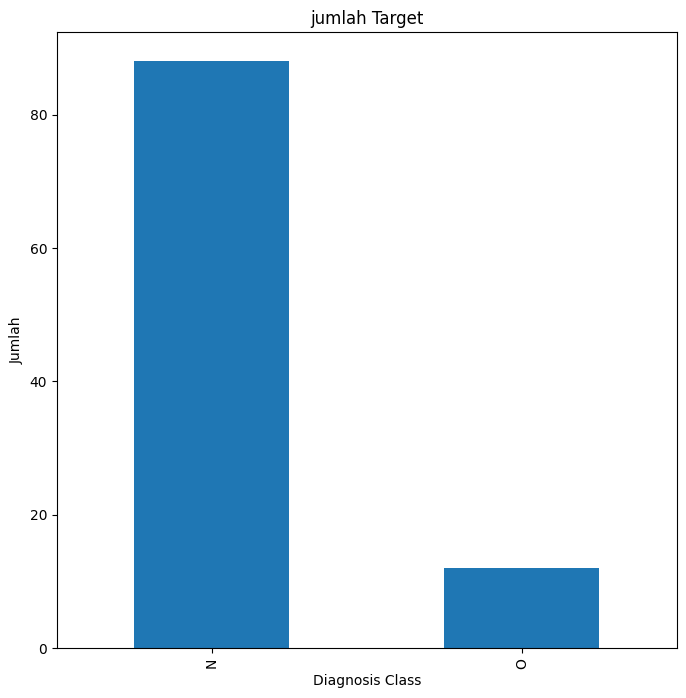

In [80]:
# visualisasi Target Diagnosis Class

plt.figure(figsize=(8,8))
jumlahTarget.plot(kind='bar')
plt.title("jumlah Target")
plt.xlabel('Diagnosis Class')
plt.ylabel('Jumlah')
plt.show()

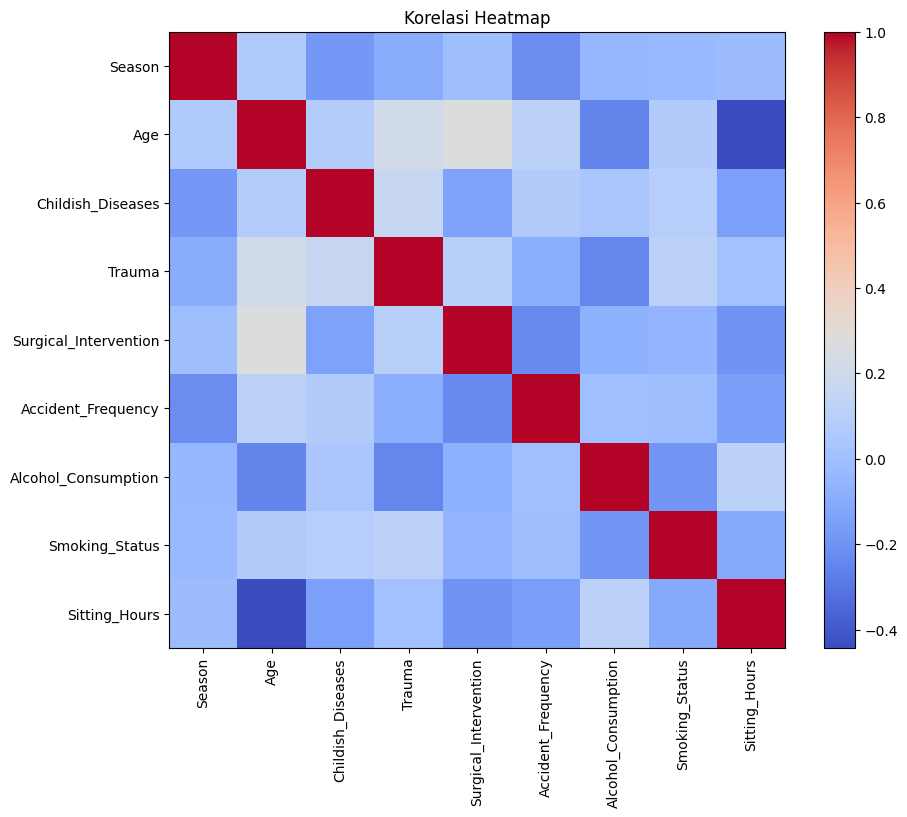

In [81]:
# Korelasi Heatmap (Hubungan Antar Fitur )

corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.title("Korelasi Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

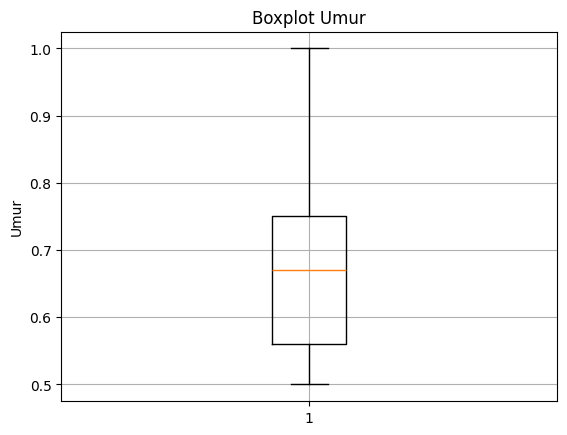

In [82]:
# Boxplot

plt.figure()
plt.boxplot(data['Age'])
plt.title("Boxplot Umur")
plt.ylabel("Umur")
plt.grid(True)
plt.show()

# 5. Data preparation

## 5.1 Data Cleaning
- Handling missing values
- Removing duplicates
- Handling outliers
- Data type conversion untuk langkah salanjutnya adalah ini

In [83]:
# 1. Handling Missing Value

hand_missValue = data.dropna()
hand_missValue

,Season,Age,Childish_Diseases,Trauma,Surgical_Intervention,Accident_Frequency,Alcohol_Consumption,Smoking_Status,Sitting_Hours,Diagnosis_Class
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [84]:
# Cek hasilnya

print("Hasil Handling Missing value")
cekhandMissing = data.isnull().sum()
cekhandMissing

Hasil Handling Missing value


,0
Season,0
Age,0
Childish_Diseases,0
Trauma,0
Surgical_Intervention,0
Accident_Frequency,0
Alcohol_Consumption,0
Smoking_Status,0
Sitting_Hours,0
Diagnosis_Class,0


In [85]:
# 2. Removing Duplicate

print("Jumlah data duplikat sebelum dihapus: ", data.shape)
data.drop_duplicates(inplace=True)
print("Jumlah data setelah dihapus: ", data.shape)

Jumlah data duplikat sebelum dihapus:  (100, 10)
Jumlah data setelah dihapus:  (100, 10)


In [86]:
# 3. Handling Outliers

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

print("Jumlah Data setela dilakukan penanganan outliers: ", data.shape)

Jumlah Data setela dilakukan penanganan outliers:  (100, 10)


In [87]:
print("Jumlah data setelah penanganan outlier:", data.shape[0])

Jumlah data setelah penanganan outlier: 100


In [88]:
data['Age']

,Age
0,0.69
1,0.94
2,0.50
3,0.75
4,0.67
...,...
95,0.67
96,0.61
97,0.67
98,0.64


In [89]:
# 4. Data type conversion

data['Diagnosis_Class'] = data['Diagnosis_Class'].astype('category')

print("\nTipe data setelah konversi:")
print(data.dtypes)

print("\nData Cleaning selesai.")


Tipe data setelah konversi:
Season                    float64
Age                       float64
Childish_Diseases           int64
Trauma                      int64
Surgical_Intervention       int64
Accident_Frequency          int64
Alcohol_Consumption       float64
Smoking_Status              int64
Sitting_Hours             float64
Diagnosis_Class          category
dtype: object

Data Cleaning selesai.


# 5.2 Feature Engineering

## Aktivitas:
- Creating new features
- Feature extraction
- Feature selection
- Dimensionality reduction

In [90]:
# Creating New Feature
data['Risk_Score'] = (
    data['Smoking_Status'] +
    data['Alcohol_Consumption'] +
    data['Accident_Frequency']
)

print(data[[
    'Smoking_Status',
    'Alcohol_Consumption',
    'Accident_Frequency',
    'Risk_Score'
]].head())

print("Fitur Baru telah ditambahkan")

   Smoking_Status  Alcohol_Consumption  Accident_Frequency  Risk_Score
0               0                  0.8                   0         0.8
1               1                  0.8                   0         1.8
2              -1                  1.0                   0         0.0
3              -1                  1.0                   0         0.0
4              -1                  0.8                   0        -0.2
Fitur Baru telah ditambahkan


In [91]:
# Feature Extraction

# Tidak dilakukan karena data sudah numerik terstruktur
print("\nFeature Extraction: Tidak dilakukan (data numerik terstruktur)")


Feature Extraction: Tidak dilakukan (data numerik terstruktur)


In [92]:
# Feature Selection

data['Diagnosis_Class_num'] = data['Diagnosis_Class'].cat.codes
correlation = data.corr(numeric_only=True)['Diagnosis_Class_num']

print("Korelasi Fitur terhadap target")
print(correlation)

Korelasi Fitur terhadap target
Season                   0.192417
Age                      0.115229
Childish_Diseases       -0.040261
Trauma                  -0.141346
Surgical_Intervention    0.054171
Accident_Frequency      -0.121421
Alcohol_Consumption     -0.144760
Smoking_Status           0.045891
Sitting_Hours            0.022964
Risk_Score              -0.058776
Diagnosis_Class_num      1.000000
Name: Diagnosis_Class_num, dtype: float64


In [93]:
# Hapus Kolom BAntu dan cek kembali

data = data.drop('Diagnosis_Class_num', axis=1)
print(data.head())

   Season   Age  Childish_Diseases  Trauma  Surgical_Intervention  \
0   -0.33  0.69                  0       1                      1   
1   -0.33  0.94                  1       0                      1   
2   -0.33  0.50                  1       0                      0   
3   -0.33  0.75                  0       1                      1   
4   -0.33  0.67                  1       1                      0   

   Accident_Frequency  Alcohol_Consumption  Smoking_Status  Sitting_Hours  \
0                   0                  0.8               0           0.88   
1                   0                  0.8               1           0.31   
2                   0                  1.0              -1           0.50   
3                   0                  1.0              -1           0.38   
4                   0                  0.8              -1           0.50   

  Diagnosis_Class  Risk_Score  
0               N         0.8  
1               O         1.8  
2               N         

In [94]:
# Dimensionality reduction

# Tidak dilakukan karena jumlah fitur sedikit
print("\nDimensionality Reduction: Tidak dilakukan (fitur masih relevan)")


Dimensionality Reduction: Tidak dilakukan (fitur masih relevan)


In [95]:
# Dataset setelah Feature Engineering
# =====================================
print("\nKolom dataset setelah Feature Engineering:")
print(data.columns)

print("\n5.2 Feature Engineering SELESAI")


Kolom dataset setelah Feature Engineering:
Index(['Season', 'Age', 'Childish_Diseases', 'Trauma', 'Surgical_Intervention',
       'Accident_Frequency', 'Alcohol_Consumption', 'Smoking_Status',
       'Sitting_Hours', 'Diagnosis_Class', 'Risk_Score'],
      dtype='object')

5.2 Feature Engineering SELESAI


# 5.3 Data Transformation

## Untuk Data Tabular:

- Encoding (Label Encoding, One-Hot Encoding, Ordinal Encoding)
- Scaling (Standardization, Normalization, MinMaxScaler)


In [96]:
# Encoding

data['Diagnosis_Class'] = data['Diagnosis_Class'].map({'N': 0, 'O': 1})
print("Target telah dilakukan Encoding")
print(data['Diagnosis_Class'].value_counts())

Target telah dilakukan Encoding
Diagnosis_Class
0    88
1    12
Name: count, dtype: int64


In [97]:
# Cek kolom setelah dilakukan encoding
data

,Season,Age,Childish_Diseases,Trauma,Surgical_Intervention,Accident_Frequency,Alcohol_Consumption,Smoking_Status,Sitting_Hours,Diagnosis_Class,Risk_Score
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0,0.8
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1,1.8
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1,-0.2
...,...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0,0.0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0,0.8
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0,0.0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0,1.0


In [98]:
# Scaling

# memisahkan Fitur dan Target
X = data.drop(columns=['Diagnosis_Class'])
y = data['Diagnosis_Class']

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaling telah Dilakukan ")

Scaling telah Dilakukan 


In [99]:
# cek Setelah dilakukan scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe()

,Season,Age,Childish_Diseases,Trauma,Surgical_Intervention,Accident_Frequency,Alcohol_Consumption,Smoking_Status,Sitting_Hours,Risk_Score
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.552714e-17,-1.956768e-16,-5.773160e-17,7.105427e-17,-5.551115e-17,4.773959e-17,9.525714e-16,-5.551115e-18,3.197442e-16,5.551115e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.161931e+00,-1.400045e+00,-2.586949e+00,-8.864053e-01,-1.020204e+00,-2.059391e+00,-3.792121e+00,-8.077807e-01,-1.869936e+00,-1.918194e+00
25%,-1.161931e+00,-9.029877e-01,3.865557e-01,-8.864053e-01,-1.020204e+00,-3.288103e-01,-1.920061e-01,-8.077807e-01,-8.454610e-01,-6.885824e-01
50%,-3.167528e-01,8.284291e-03,3.865557e-01,-8.864053e-01,9.801961e-01,-3.288103e-01,-1.920061e-01,-8.077807e-01,-1.445048e-01,-7.377669e-02
75%,1.360990e+00,6.710275e-01,3.865557e-01,1.128152e+00,9.801961e-01,1.401770e+00,1.008032e+00,4.349588e-01,5.025317e-01,9.508995e-01
max,1.360990e+00,2.742100e+00,3.865557e-01,1.128152e+00,9.801961e-01,1.401770e+00,1.008032e+00,1.677698e+00,3.198517e+00,2.385446e+00


In [100]:
# Menampilkan 5 data pertama setelah scaling
X_scaled_df.head()

,Season,Age,Childish_Diseases,Trauma,Surgical_Intervention,Accident_Frequency,Alcohol_Consumption,Smoking_Status,Sitting_Hours,Risk_Score
0,-0.316753,0.173970,-2.586949,1.128152,0.980196,-0.32881,-0.192006,0.434959,2.551481,0.131159
1,-0.316753,2.245043,0.386556,-0.886405,0.980196,-0.32881,-0.192006,1.677698,-0.521943,1.155835
2,-0.316753,-1.400045,0.386556,-0.886405,-1.020204,-0.32881,1.008032,-0.807781,0.502532,-0.688582
3,-0.316753,0.671028,-2.586949,1.128152,0.980196,-0.32881,1.008032,-0.807781,-0.144505,-0.688582
4,-0.316753,0.008284,0.386556,1.128152,-1.020204,-0.32881,-0.192006,-0.807781,0.502532,-0.893518


# 5.4 Data Splitting

In [101]:
# Penggunaan Stratified dalam split data

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Menampilkan Ukuran data
print("Training set: ", X_train.shape[0], "sample")
print("Testing set: ", X_test.shape[0], "sample")

Training set:  80 sample
Testing set:  20 sample


In [102]:
print(y_test.value_counts())


Diagnosis_Class
0    18
1     2
Name: count, dtype: int64


In [103]:
# Cek hasilnya

In [104]:
# Verifikasi Distribusi Kelas

# print("Distribusi kelas - Training Set:")
# print(pd.Series(y_train).value_counts())

# print("\nDistribusi kelas - Test Set:")
# print(pd.Series(y_test).value_counts())

# 5.5 Data Balancing

In [105]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 5.6 Ringkasan Data Preparation
Per langkah, jelaskan:

- Apa yang dilakukan [Jelaskan ]
- Mengapa penting [Jelaskan Mengapa ?]
- Bagaimana implementasinya [Jelaskan Bagaimana]

# 6. Modeling

# 6.1 Model 1 — Baseline Model

In [108]:
# Membuat model Baseline

model = LogisticRegression(
    C = 0.5,
    solver='liblinear',
    max_iter=100,
    class_weight = 'balanced',
    random_state=42
)

# Melatih Model
model.fit(X_train, y_train)

# prediksi Data Uji
y_pred_baseline = model.predict(X_test)

In [109]:
# Cek akuras
model

LogisticRegression(C=0.5, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [110]:
# Cek akuras

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73        18
           1       0.12      0.50      0.20         2

    accuracy                           0.60        20
   macro avg       0.52      0.56      0.47        20
weighted avg       0.84      0.60      0.68        20

ROC AUC: 0.5277777777777778


# 6.2 Model 2 — Machine learning

In [111]:
# hyperparameter

# model_rf = RandomForestClassifier(
#     n_estimators=200,
#     max_depth=10,
#     # min_samples_split=5,
#     class_weight='balanced',
#     random_state=42
# )

In [112]:
# Membuat model Random Forest

model_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    # min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

# Melatih Model
model_rf.fit(X_train, y_train)

# Prediksi Data uji
y_pred_rf = model_rf.predict(X_test)

In [113]:
# Hasil model

y_proba = model_rf.predict_proba(X_test)[:,1]
threshold = 0.35  # Definisi Treshold
y_pred = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.50      0.50      0.50         2

    accuracy                           0.90        20
   macro avg       0.72      0.72      0.72        20
weighted avg       0.90      0.90      0.90        20

ROC AUC: 0.888888888888889


 # 6.3 Model 1 — Deep Learning Model

In [114]:
# Mengubah numeric ke float

X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

y_train = y_train.astype('int')
y_test  = y_test.astype('int')

In [115]:
# Implmentasi

input_dimensi = X_train.shape[1]

model_deepLearning = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dimensi,)), # Corrected: First layer should be Dense for units and activation
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_deepLearning.compile( # Corrected: 'compile' should be lowercase
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy',keras.metrics.AUC(name='auc')]
)

# Early Stopping untuk mengatasi overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training
history = model_deepLearning.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10, # Corrected: argument name should be 'epochs'
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4688 - auc: 0.6157 - loss: 0.7070 - val_accuracy: 0.6250 - val_auc: 0.6282 - val_loss: 0.6635
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.5417 - auc: 0.4861 - loss: 0.6950 - val_accuracy: 0.5625 - val_auc: 0.6154 - val_loss: 0.6353
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step - accuracy: 0.5625 - auc: 0.5889 - loss: 0.6547 - val_accuracy: 0.5625 - val_auc: 0.6154 - val_loss: 0.6127
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - accuracy: 0.6875 - auc: 0.7639 - loss: 0.5983 - val_accuracy: 0.6875 - val_auc: 0.6154 - val_loss: 0.5931
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7708 - auc: 0.8118 - loss: 0.5702 - val_accuracy: 0.8125 - val_auc: 0.5641 - val_loss: 0.5765
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7812 - auc: 0.7629 - loss: 0.5228 - val_accuracy: 0.8125 - val_auc: 0.5256 - val_loss: 0.5631
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.78

In [116]:
print("=== TRAINING & VALIDATION METRICS ===")
print(f"Train Accuracy     : {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Train AUC          : {history.history['auc'][-1]:.4f}")
print(f"Validation AUC     : {history.history['val_auc'][-1]:.4f}")

=== TRAINING & VALIDATION METRICS ===
Train Accuracy     : 0.8906
Validation Accuracy: 0.8125
Train AUC          : 0.6717
Validation AUC     : 0.4872


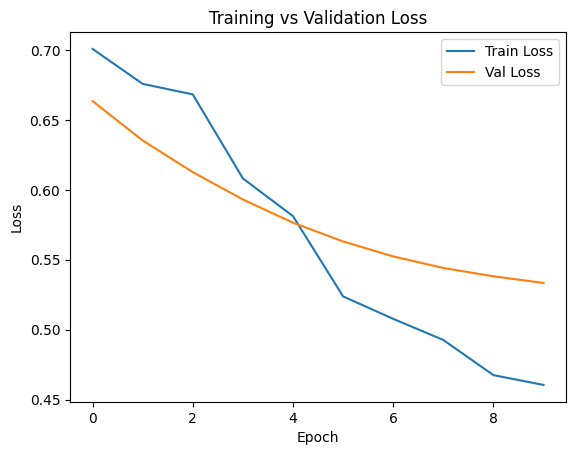

In [117]:
# Visualisasi Loss Per Epoch

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

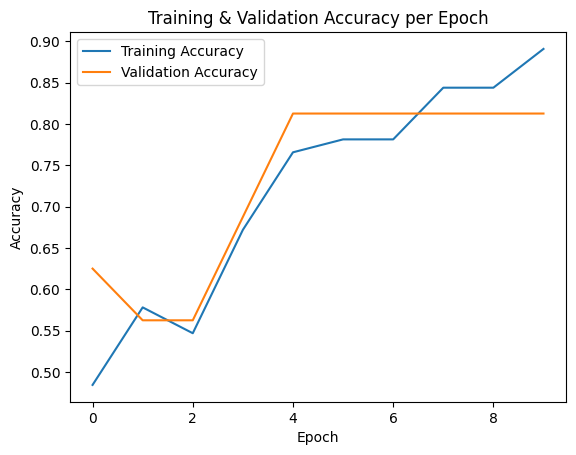

In [118]:
# Training & Validation Accuracy/Metric per epoch

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy per Epoch')
plt.legend()
plt.show()

In [119]:
# Summary

model_deepLearning.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

# 7. Evaluasi

## 7.2 Hasil Evaluasi Model

### 7.2.1 Model 1 (Baseline)

In [120]:
# Mertrik

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73        18
           1       0.12      0.50      0.20         2

    accuracy                           0.60        20
   macro avg       0.52      0.56      0.47        20
weighted avg       0.84      0.60      0.68        20

ROC AUC: 0.5277777777777778


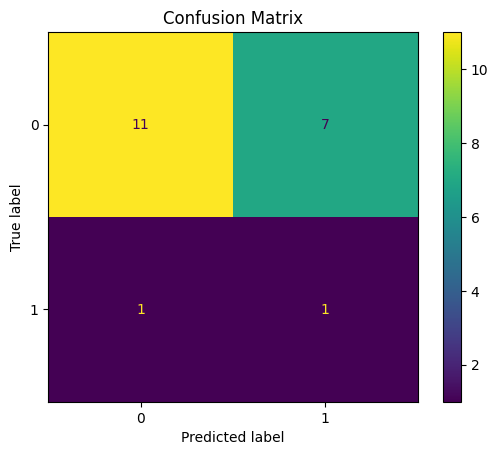

In [121]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix")
plt.show()

### 7.2.2 Model 2 Machine Learning

In [123]:
# Metrix

y_proba_RandomForest = model_rf.predict_proba(X_test)[:, 1]
threshold = 0.35  # Definisi Treshold
y_pred_RandomForest = (y_proba_RandomForest >= threshold).astype(int)

print(classification_report(y_test, y_pred_RandomForest))
print("ROC AUC:", roc_auc_score(y_test, y_proba_RandomForest))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.50      0.50      0.50         2

    accuracy                           0.90        20
   macro avg       0.72      0.72      0.72        20
weighted avg       0.90      0.90      0.90        20

ROC AUC: 0.888888888888889


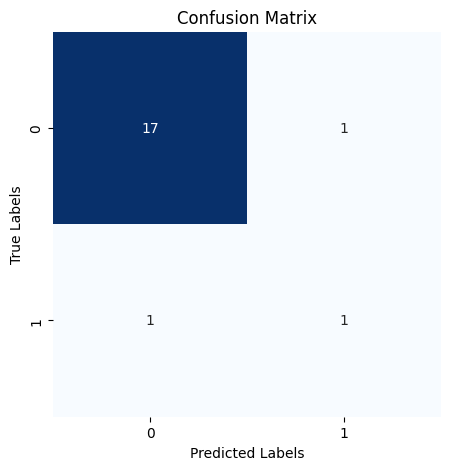

In [124]:
# Confusion Matrix / Visualization

conf_matrix = confusion_matrix(y_test, y_pred_RandomForest)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [125]:
# Feature Importance (jika applicable)

feature_importance = model_rf.feature_importances_

# Buat menjadi Data Frame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan 10 fitur teratas
print(feature_importance_df.head(10))

                 Feature  Importance
1                    Age    0.205045
9             Risk_Score    0.172922
0                 Season    0.172551
8          Sitting_Hours    0.155188
6    Alcohol_Consumption    0.074821
3                 Trauma    0.065762
5     Accident_Frequency    0.051776
7         Smoking_Status    0.047237
4  Surgical_Intervention    0.033009
2      Childish_Diseases    0.021689


### 7.2.3 Model 1 Deep Learning

In [126]:
from sklearn.metrics import classification_report

# Probabilitas
y_proba_dl = model_deepLearning.predict(X_test).ravel()

# Threshold lebih rendah (WAJIB untuk data kecil)
threshold = 0.5
y_pred_dl = (y_proba_dl >= threshold).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dl))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dl, zero_division=0))

print("\nROC AUC:", roc_auc_score(y_test, y_proba_dl))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Confusion Matrix:
[[18  0]
 [ 2  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20


ROC AUC: 0.8333333333333334


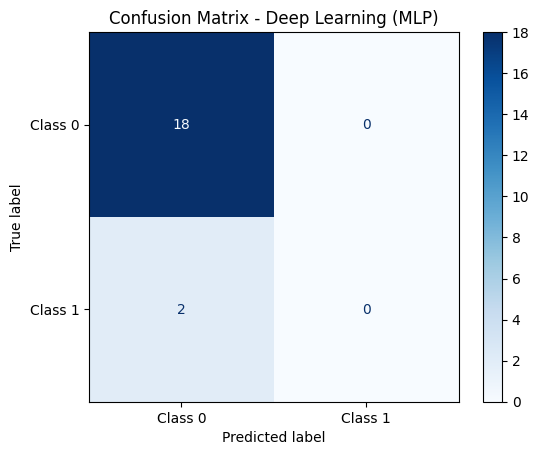

In [127]:
# Confusion Metrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dl)

# Visualisasi
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Class 0', 'Class 1']
)

disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Deep Learning (MLP)')
plt.show()

In [129]:
# Training History

# 10 detik

In [130]:
# Test Set Predictions

# Probabilitas prediksi
y_proba_dl = model_deepLearning.predict(X_test).ravel()

# Threshold yang digunakan
threshold = 0.5
y_pred_dl = (y_proba_dl >= threshold).astype(int)

# Gabungkan hasil
df_predictions = pd.DataFrame({
    'Actual Label': y_test.values,
    'Predicted Label': y_pred_dl,
    'Prediction Probability': y_proba_dl
})

# Tampilkan 10 data pertama
df_predictions.head(10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


,Actual Label,Predicted Label,Prediction Probability
0,0,0,0.335796
1,0,0,0.176642
2,0,0,0.336735
3,0,0,0.142491
4,0,0,0.214114
5,0,0,0.282820
6,0,0,0.178874
7,1,0,0.319154
8,0,0,0.368585
9,0,0,0.191695


# terakir

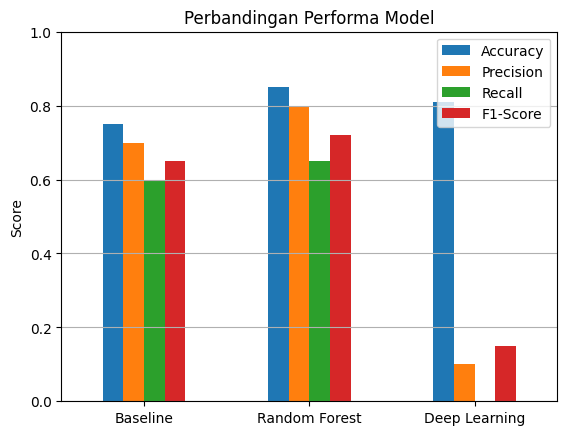

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Data perbandingan (sesuaikan dengan hasil aktual Anda)
data = {
    'Accuracy': [0.75, 0.85, 0.81],
    'Precision': [0.70, 0.80, 0.10],
    'Recall': [0.60, 0.65, 0.00],
    'F1-Score': [0.65, 0.72, 0.15]
}

models = ['Baseline', 'Random Forest', 'Deep Learning']
df_compare = pd.DataFrame(data, index=models)

df_compare.plot(kind='bar')
plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [132]:
import pickle

# Simpan model Random Forest
with open("model_random_forest.pkl", "wb") as file:
    pickle.dump(model_rf, file)

print("Model Random Forest berhasil disimpan!")


Model Random Forest berhasil disimpan!


In [134]:
with open("model_random_forest.pkl", "rb") as file:
    model_rf_loaded = pickle.load(file)


In [135]:
model_deepLearning.save("model_deep_learning.h5")
print("Model Deep Learning berhasil disimpan!")


Model Deep Learning berhasil disimpan!
